## PID Controller

---- 

conda env : [rl_learning](../Book_deep_learning_from_scratch_4/README.md#setup-a-conda-environment)

---
### Reference:

- ***Blog***:
    - https://learnopencv.com/pid-controller-ros-2-carla/

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

`## P Controller`

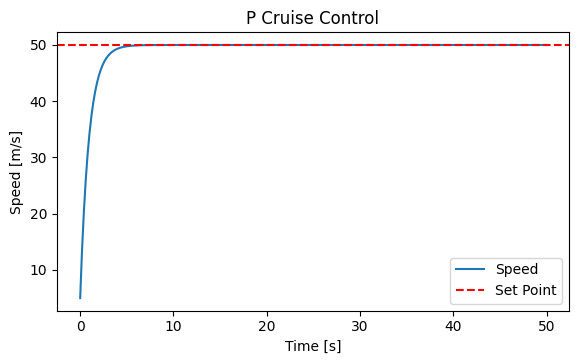

In [3]:
class PController:
    def __init__(self, Kp, set_point):
        self.Kp = Kp
        self.set_point = set_point


    def update(self, current_value, dt):
        error = self.set_point - current_value
        output = self.Kp * error
        return output

dt = 0.1
time = np.arange(0, 50, dt)

controller = PController(Kp=1.0, set_point=50)

speed = 0
throttle_with_resistance = []
speed_record_with_resitance = []

for t in time:
    control = controller.update(speed, dt)
    speed += control * dt
    throttle_with_resistance.append(control)
    speed_record_with_resitance.append(speed)

fig, ax = plt.subplots()
plt.subplots_adjust(left = 0.1, bottom=0.3)

l, = plt.plot(time, speed_record_with_resitance, label="Speed")
plt.axhline(controller.set_point, color='r', linestyle='--', label='Set Point')
plt.xlabel('Time [s]')
plt.ylabel('Speed [m/s]')
plt.title('P Cruise Control')
plt.legend()
plt.show()

## P Controller with Resistance

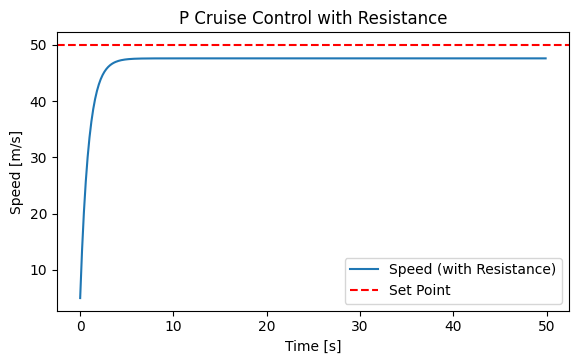

In [4]:
class PControllerWithResistance:
    def __init__(self, Kp, set_point, resistance_factor = 0.1):
        self.Kp = Kp
        self.set_point = set_point
        self.resistance_factor = resistance_factor

    def update(self, current_value, dt):
        error = self.set_point - current_value
        output = self.Kp * error
        return output - self.resistance_factor * current_value

dt = 0.1
time = np.arange(0, 50, dt)

controller = PControllerWithResistance(Kp=1.0, set_point=50, resistance_factor=0.05)

speed = 0
throttle_with_resistance = []
speed_record_with_resitance = []

for t in time:
    control = controller.update(speed, dt)
    speed += control * dt
    throttle_with_resistance.append(control)
    speed_record_with_resitance.append(speed)

fig, ax = plt.subplots()
plt.subplots_adjust(left = 0.1, bottom=0.3)

l, = plt.plot(time, speed_record_with_resitance, label="Speed (with Resistance)")
plt.axhline(controller.set_point, color='r', linestyle='--', label='Set Point')
plt.xlabel('Time [s]')
plt.ylabel('Speed [m/s]')
plt.title('P Cruise Control with Resistance')
plt.legend()
plt.show()

## PI Controller with Resistance

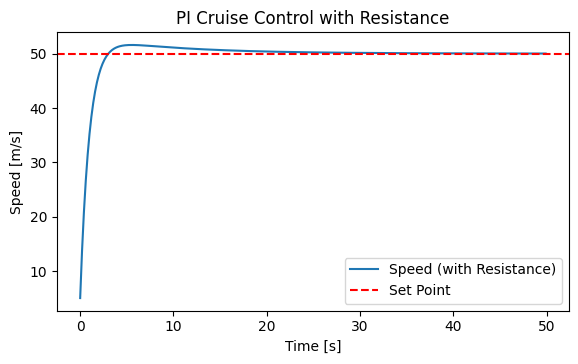

In [5]:
class PIControllerWithResistance:
    def __init__(self, Kp, Ki, set_point, resistance_factor = 0.1):
        self.Kp = Kp
        self.Ki = Ki
        self.set_point = set_point
        self.integral = 0
        self.resistance_factor = resistance_factor

    def update(self, current_value, dt):
        error = self.set_point - current_value
        self.integral += error * dt
        output = self.Kp * error  + self.Ki * self.integral
        return output - self.resistance_factor * current_value

dt = 0.1
time = np.arange(0, 50, dt)

controller = PIControllerWithResistance(Kp=1.0, Ki = 0.1, set_point=50, resistance_factor=0.05)

speed = 0
throttle_with_resistance = []
speed_record_with_resitance = []

for t in time:
    control = controller.update(speed, dt)
    speed += control * dt
    throttle_with_resistance.append(control)
    speed_record_with_resitance.append(speed)

fig, ax = plt.subplots()
plt.subplots_adjust(left = 0.1, bottom=0.3)

l, = plt.plot(time, speed_record_with_resitance, label="Speed (with Resistance)")
plt.axhline(controller.set_point, color='r', linestyle='--', label='Set Point')
plt.xlabel('Time [s]')
plt.ylabel('Speed [m/s]')
plt.title('PI Cruise Control with Resistance')
plt.legend()
plt.show()

## PID Controller with Resistance

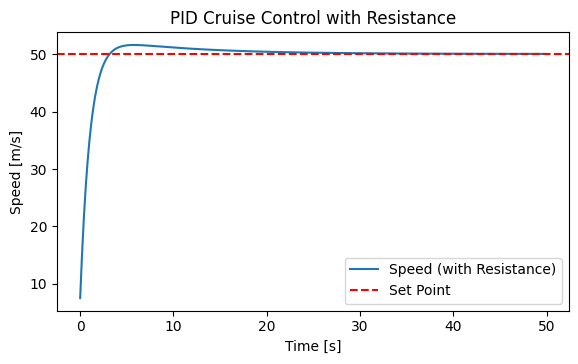

In [6]:
class PIDControllerWithResistance:
    def __init__(self, Kp, Ki, Kd, set_point, resistance_factor = 0.1):
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        self.set_point = set_point
        self.prev_error = 0
        self.integral = 0
        self.resistance_factor = resistance_factor

    def update(self, current_value, dt):
        error = self.set_point - current_value
        self.integral += error * dt
        derivative = (error - self.prev_error) / dt
        output = self.Kp * error  + self.Ki * self.integral + self.Kd * derivative
        self.prev_error = error
        return output - self.resistance_factor * current_value

dt = 0.1
time = np.arange(0, 50, dt)

controller = PIDControllerWithResistance(Kp=1.0, Ki = 0.1, Kd = 0.05, set_point=50, resistance_factor=0.05)

speed = 0
throttle_with_resistance = []
speed_record_with_resitance = []

for t in time:
    control = controller.update(speed, dt)
    speed += control * dt
    throttle_with_resistance.append(control)
    speed_record_with_resitance.append(speed)

fig, ax = plt.subplots()
plt.subplots_adjust(left = 0.1, bottom=0.3)

l, = plt.plot(time, speed_record_with_resitance, label="Speed (with Resistance)")
plt.axhline(controller.set_point, color='r', linestyle='--', label='Set Point')
plt.xlabel('Time [s]')
plt.ylabel('Speed [m/s]')
plt.title('PID Cruise Control with Resistance')
plt.legend()
plt.show()